In [2]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex, simplify
#from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
from numpy import linspace
#import matplotlib.pyplot as plt
#import math
from theoric.tools import *
#import torch
from torch import tensor

theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)


# tem que arrumar a função abaixo ainda
def calculated_rho_AB(theta, phi, p):
    state = Matrix([[(cos(theta/2)),
                     0,
                    (sqrt(1-p)*exp(1j*phi)*sin(theta/2)),
                    (sqrt(p)*exp(1j*phi)*sin(theta/2))]])
    M_numpy = np.array(state.tolist(), dtype=np.complex64)
    return M_numpy
    return state

def get_target_op(func_estado):
    state1 = simplify(func_estado)
    state2 = np.zeros(4,dtype=complex)
    aux = 0
    for i in state1[0]:
        state2[aux] = i
        aux += 1
    target_op = np.outer(state2.conj(), state2)
    target_op = tensor(target_op)
    return target_op

#state = calculated_rho_AB(theta, phi, p)
state = calculated_rho_AB(pi/2, 0, 0.5)
state

array([[0.70710677+0.j, 0.        +0.j, 0.5       +0.j, 0.5       +0.j]],
      dtype=complex64)

In [3]:
a = get_target_op(calculated_rho_AB(pi/2, 0, 1))
a


tensor([[0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j]],
       dtype=torch.complex128)

In [4]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath
import pickle
from theoric.pd_theoric import *

def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    save = False
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1
        #_, params, _, _ = start_things(n_qubits, depht)
        
        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)

        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        #target_op = bpf(pi/2, 0, p)
        target_op = get_target_op(calculated_rho_AB(pi/2, pi/2, p))
        #------------------------------------------------------------
    
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 1)
        pretrain = False
        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
    if save:
        mylist = [coerencias_L, coerencias_R]
        with open('data/ad/ad-coherences.pkl', 'wb') as f:
            pickle.dump(mylist, f)
        with open('data/ad/ad-best_params.pkl', 'wb') as f:
            pickle.dump(params, f)
    plot_theoric_pd(list_p)
    plots(list_p, coerencias_R, coerencias_L)
    #save = [list_p, coerencias_R, coerencias_L]
    #with open('data/BPFlist_p-coerencias_R-coerencias_L.pkl', 'wb') as f:
    #    pickle.dump(save, f)
    

0 de 4
[[ 0.26108829+0.j          0.23887917+0.1989791j  -0.17536627+0.21540564j
   0.07823166-0.10508199j]
 [ 0.23887917-0.1989791j   0.37574084+0.j          0.00375276+0.32890223j
  -0.00789076-0.15840423j]
 [-0.17536627-0.21540564j  0.00375276-0.32890223j  0.29610978+0.j
  -0.13836566+0.00622304j]
 [ 0.07823166+0.10508199j -0.00789076+0.15840423j -0.13836566-0.00622304j
   0.06706109+0.j        ]]
1 de 4
[[ 0.25702695+0.j          0.23767807+0.20001468j -0.17873419+0.21115861j
   0.07748541-0.10580504j]
 [ 0.23767807-0.20001468j  0.37600221+0.j         -0.00175228+0.3337179j
  -0.0112029 -0.15815939j]
 [-0.17873419-0.21115861j -0.00175228-0.3337179j   0.29958124+0.j
  -0.1400565 +0.00936905j]
 [ 0.07748541+0.10580504j -0.0112029 +0.15815939j -0.1400565 -0.00936905j
   0.06738961+0.j        ]]
2 de 4
[[ 0.28809515+0.j          0.17843611+0.33871706j -0.2007364 +0.08745638j
   0.09455264+0.01388018j]
 [ 0.17843611-0.33871706j  0.51214599+0.j         -0.02162681+0.29098347j
   0.076698

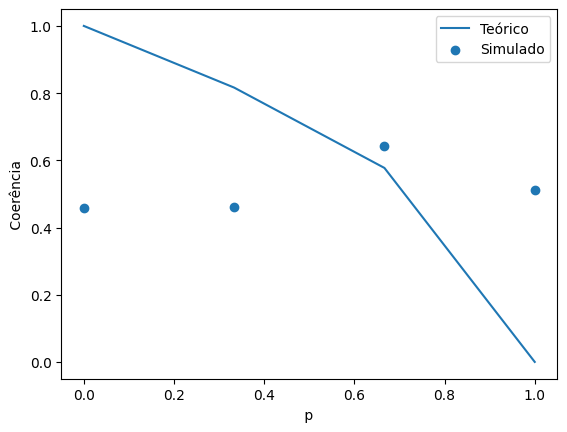

In [5]:
# teste
list_p = np.linspace(0,1,4)
run_calcs(list_p, 1)

0 de 21
[[ 4.97805060e-01+0.j          4.98095881e-01+0.00495307j
   1.86900144e-02+0.025084j   -1.56793936e-02+0.01800656j]
 [ 4.98095881e-01-0.00495307j  4.98937665e-01+0.j
   1.87980802e-02+0.02488005j -1.57014611e-02+0.01806248j]
 [ 1.86900144e-02-0.025084j    1.87980802e-02-0.02488005j
   2.01413369e-03+0.j          3.84234875e-04+0.00148724j]
 [-1.56793936e-02-0.01800656j -1.57014611e-02-0.01806248j
   3.84234875e-04-0.00148724j  1.24314099e-03+0.j        ]]
1 de 21
[[0.50169384+0.j         0.48161966-0.01685614j 0.02646376+0.00260079j
  0.12450856-0.00481315j]
 [0.48161966+0.01685614j 0.46481291+0.j         0.02564228+0.0040566j
  0.12030349+0.00066961j]
 [0.02646376-0.00260079j 0.02564228-0.0040566j  0.00170204+0.j
  0.00703919-0.00092732j]
 [0.12450856+0.00481315j 0.12030349-0.00066961j 0.00703919+0.00092732j
  0.03179121+0.j        ]]
2 de 21
[[ 0.49207079+0.j          0.46997085+0.00132492j -0.0279601 -0.0008247j
   0.16261351-0.00061274j]
 [ 0.46997085-0.00132492j  0.450631

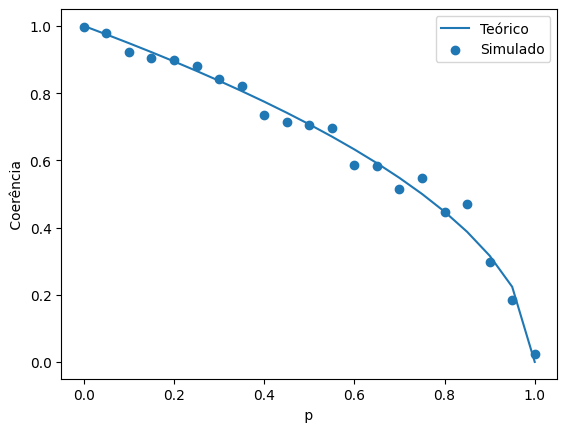

In [4]:
list_p = np.linspace(0,1,21)
run_calcs(list_p, 350)